# Vista-CA Clustering

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.animation as FuncAnimation


#ion('display.max_rows', 1000)
# pd.options.display.float_format = '{:,.0f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
df = pd.read_csv('./data/vista-ca/vista-ca-combined.csv', index_col=False)

#Pandas profiling
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_file("your_report.html")

#Generic Info
print("vista-ca SIZE:", df.shape)
print("vista-ca COLUMNS:", df.columns)
df.head()

vista-ca SIZE: (234060, 13)
vista-ca COLUMNS: Index(['Unnamed: 0', 'vistaid', 'vistaname', 'vistastype', 'latitude',
       'longitude', 'area_km2', 'vistaipcc', 'source', 'vistadate', 'state',
       'city', 'county'],
      dtype='object')


C:\Users\johnl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,vistaid,vistaname,vistastype,latitude,longitude,area_km2,vistaipcc,source,vistadate,state,city,county
0,0,CMP000001,"3D Ag, LLC",Composting Sites,37.72799,-120.89865,0.000313,4B Biological Treatment of Solid Waste,CalRecycle,2019-08-20,CA,Oakdale,NaN
1,1,CMP000002,"A. Lua Recycling, Inc.",Composting Sites,33.70999,-117.32864,0.000313,4B Biological Treatment of Solid Waste,CalRecycle,2019-08-20,CA,Lake Elsinore,NaN
2,2,CMP000003,Acme Composting Compost Facility,Composting Sites,38.01667,-122.13333,0.000313,4B Biological Treatment of Solid Waste,CalRecycle,2019-08-20,CA,Martinez,NaN
3,3,CMP000004,Adams Garden Supply,Composting Sites,34.03281,-118.35424,0.000313,4B Biological Treatment of Solid Waste,CalRecycle,2019-08-20,CA,Los Angeles (City),NaN
4,4,CMP000005,Advance Disposal Center for the Environm,Composting Sites,34.44517,-117.29007,0.000313,4B Biological Treatment of Solid Waste,CalRecycle,2019-08-20,CA,Hesperia,NaN


# DATA PROCESSING

In [2]:
# Create Train Data
train_data = []
for lat,lon in zip(df.latitude, df.longitude):
    train_data.append([lat,lon])
train_data = np.array(train_data)
print(train_data[0:5])

[[  37.72799 -120.89865]
 [  33.70999 -117.32864]
 [  38.01667 -122.13333]
 [  34.03281 -118.35424]
 [  34.44517 -117.29007]]


In [4]:
# Create Datasets for each sector
df.vistastype.unique()

array(['Composting Sites', 'Dairy', 'Digester', 'Feed Lot', 'Landfill',
       'Liquefied Natural Gas Fueling Station',
       'Compressed Natural Gas Fueling Station', 'Natural Gas Station',
       'Oil and Gas Facility Boundary', 'Oil and Gas Well', 'Power Plant',
       'Natural Gas Processing Plants', 'Refinery',
       'Natural Gas Storage Field', 'Wastewater Treatment Plant'],
      dtype=object)

In [9]:
#Subsetting dataframes
df_compost = df[df.vistastype == "Composting Sites"]
df_dairy = df[df.vistastype == "Dairy"]
df_digester = df[df.vistastype == "Digester"]
df_feedlot = df[df.vistastype == "Feed Lot"]
df_landfill = df[df.vistastype == "Landfill"]
df_lng = df[df.vistastype == "Liquefied Natural Gas Fueling Station"]
df_cng = df[df.vistastype == "Compressed Natural Gas Fueling Station"]
df_ngs = df[df.vistastype == "Natural Gas Station"]
df_ogfacilityb = df[df.vistastype == "Oil and Gas Facility Boundary"]
df_ogwell = df[df.vistastype == "Oil and Gas Well"]
df_powerplant = df[df.vistastype == "Power Plant"]
df_ngplant = df[df.vistastype == "Natural Gas Processing Plants"]
df_refinery = df[df.vistastype == "Refinery"]
df_ngstorage = df[df.vistastype == "Natural Gas Storage Field"]
df_wastewater = df[df.vistastype == "Wastewater Treatment Plant"]

# PLOT

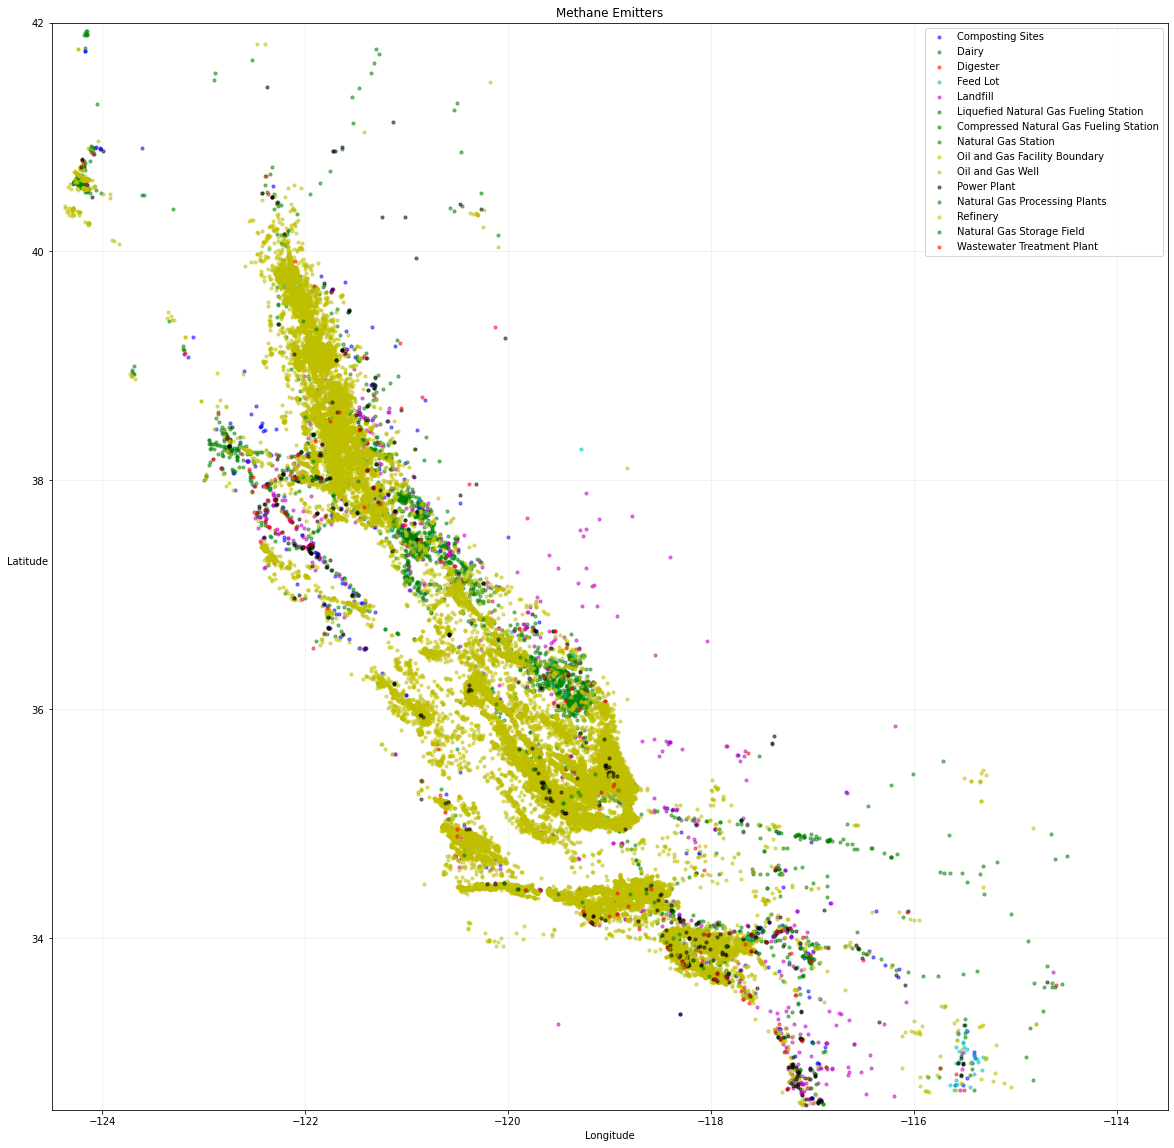

In [14]:
#Plotting 1 plot
%matplotlib inline

fig1=plt.figure(figsize=(20,20))
plt.ylim([32.5,42])
plt.xlim([-124.5,-113.5])

# plt.colorbar(fig1)
fig1=plt.title('Methane Emitters')
fig1=plt.xlabel('Longitude')
fig1=plt.ylabel('Latitude', rotation=0)
fig1=plt.grid(True, alpha=0.2)

# fig1=plt.scatter(df_date.lat, df_date.lon, color='red', alpha=0.5, s=df_date.methane_mixing_ratio_bias_corrected/1000)
# fig1=plt.scatter(df_date.lat, df_date.lon, c=df_date.methane_mixing_ratio_bias_corrected, cmap='rainbow', alpha=0.50, vmin=1850,vmax=1950)
fig1=plt.scatter(df_compost.longitude, df_compost.latitude, color='b', alpha=0.5, s=10)
fig1=plt.scatter(df_dairy.longitude, df_dairy.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_digester.longitude, df_digester.latitude, color='r', alpha=0.5, s=10)
fig1=plt.scatter(df_feedlot.longitude, df_feedlot.latitude, color='c', alpha=0.5, s=10)
fig1=plt.scatter(df_landfill.longitude, df_landfill.latitude, color='m', alpha=0.5, s=10)
fig1=plt.scatter(df_lng.longitude, df_lng.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_cng.longitude, df_cng.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_ngs.longitude, df_ngs.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_ogfacilityb.longitude, df_ogfacilityb.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_ogwell.longitude, df_ogwell.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_powerplant.longitude, df_powerplant.latitude, color='k', alpha=0.5, s=10)
fig1=plt.scatter(df_ngplant.longitude, df_ngplant.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_refinery.longitude, df_refinery.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_ngstorage.longitude, df_ngstorage.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_wastewater.longitude, df_wastewater.latitude, color='r', alpha=0.5, s=10)

plt.legend(['Composting Sites', 'Dairy', 'Digester', 'Feed Lot', 'Landfill',
       'Liquefied Natural Gas Fueling Station',
       'Compressed Natural Gas Fueling Station', 'Natural Gas Station',
       'Oil and Gas Facility Boundary', 'Oil and Gas Well', 'Power Plant',
       'Natural Gas Processing Plants', 'Refinery',
       'Natural Gas Storage Field', 'Wastewater Treatment Plant'])#, loc='lower left')


# KMEANS CLUSTERING

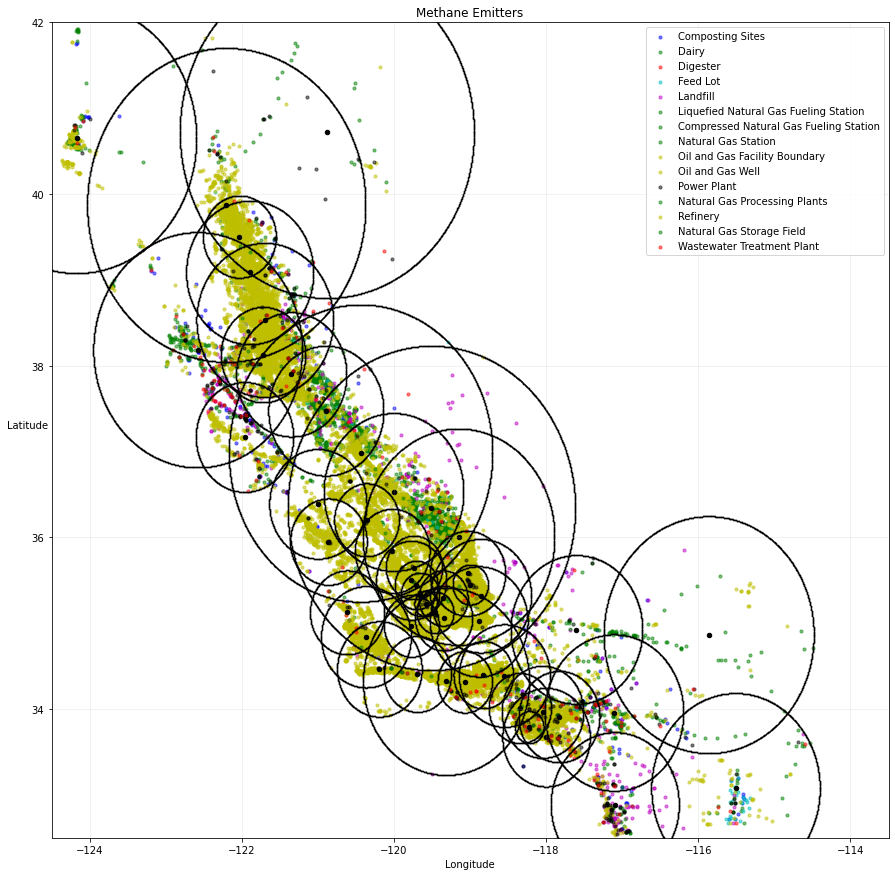

In [23]:
#Run KMeans
C=50
km = KMeans(n_clusters=C)
clstrs=km.fit(train_data)
# print(clstrs)
# print(clstrs.cluster_centers_[0:5])

#Plotting the 2-d PCA data along with the cluster centers
%matplotlib inline

fig1, ax= plt.subplots(figsize=(15,15))
plt.ylim([32.5,42])
plt.xlim([-124.5,-113.5])

# plt.colorbar(fig1)
fig1=plt.title('Methane Emitters')
fig1=plt.xlabel('Longitude')
fig1=plt.ylabel('Latitude', rotation=0)
fig1=plt.grid(True, alpha=0.2)

fig1=plt.scatter(df_compost.longitude, df_compost.latitude, color='b', alpha=0.5, s=10)
fig1=plt.scatter(df_dairy.longitude, df_dairy.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_digester.longitude, df_digester.latitude, color='r', alpha=0.5, s=10)
fig1=plt.scatter(df_feedlot.longitude, df_feedlot.latitude, color='c', alpha=0.5, s=10)
fig1=plt.scatter(df_landfill.longitude, df_landfill.latitude, color='m', alpha=0.5, s=10)
fig1=plt.scatter(df_lng.longitude, df_lng.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_cng.longitude, df_cng.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_ngs.longitude, df_ngs.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_ogfacilityb.longitude, df_ogfacilityb.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_ogwell.longitude, df_ogwell.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_powerplant.longitude, df_powerplant.latitude, color='k', alpha=0.5, s=10)
fig1=plt.scatter(df_ngplant.longitude, df_ngplant.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_refinery.longitude, df_refinery.latitude, color='y', alpha=0.5, s=10)
fig1=plt.scatter(df_ngstorage.longitude, df_ngstorage.latitude, color='g', alpha=0.5, s=10)
fig1=plt.scatter(df_wastewater.longitude, df_wastewater.latitude, color='r', alpha=0.5, s=10)

fig1=plt.scatter(clstrs.cluster_centers_[:,1], clstrs.cluster_centers_[:,0], color='black',s=20) 

plt.legend(['Composting Sites', 'Dairy', 'Digester', 'Feed Lot', 'Landfill',
       'Liquefied Natural Gas Fueling Station',
       'Compressed Natural Gas Fueling Station', 'Natural Gas Station',
       'Oil and Gas Facility Boundary', 'Oil and Gas Well', 'Power Plant',
       'Natural Gas Processing Plants', 'Refinery',
       'Natural Gas Storage Field', 'Wastewater Treatment Plant'])#, loc='lower left')

    
#Finding Most distant example in cluster and plotting a circle based on this point    
for j in range(C):
    c=train_data[np.where(clstrs.labels_==j)]     #finds all points in a cluster
    lnorm=[]                                 #create a list of lnorms of each point in the cluster
    for k in range(len(c)):
        lnorm.append(np.linalg.norm(c[k]-clstrs.cluster_centers_[j]))
    maximum=np.where(lnorm==max(lnorm))      #find index for the point with maximum lnorm 

    #Plotting circles by creating 100 points around a centroid with radius based on furthest point    
    a=c[maximum][0][0]-clstrs.cluster_centers_[j][0]               #Find radius with r=sqrt(a^2+b^2)
    b=c[maximum][0][1]-clstrs.cluster_centers_[j][1]
    r=np.sqrt(a**2+b**2)
    pts = int(r*1000)                                               #generate points in degrees for a circle
    theta=np.linspace(0,2*np.pi,pts)                               #generate points in degrees for a circle
    x1=r*np.cos(theta)+clstrs.cluster_centers_[j][1]         
    x2=r*np.sin(theta)+clstrs.cluster_centers_[j][0]
    fig1=plt.scatter(x1,x2, color='black',marker='.', alpha=1,s=1)   

# GMM CLUSTERING

<ipython-input-21-5c345a9e70cc>:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = fig.colorbar(CS, shrink=0.8, extend='both', ax=axs[n-1,counter])
<ipython-input-21-5c345a9e70cc>:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = fig.colorbar(CS, shrink=0.8, extend='both', ax=axs[n-1,counter])
<ipython-input-21-5c345a9e70cc>:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = fig.colorbar(CS, shrink=0.8, extend='both', ax=axs[n-1,counter])
<ipython-input-21-5c345a9e70cc>:30: MatplotlibDeprecationWarning: The 'extend' parameter to Co

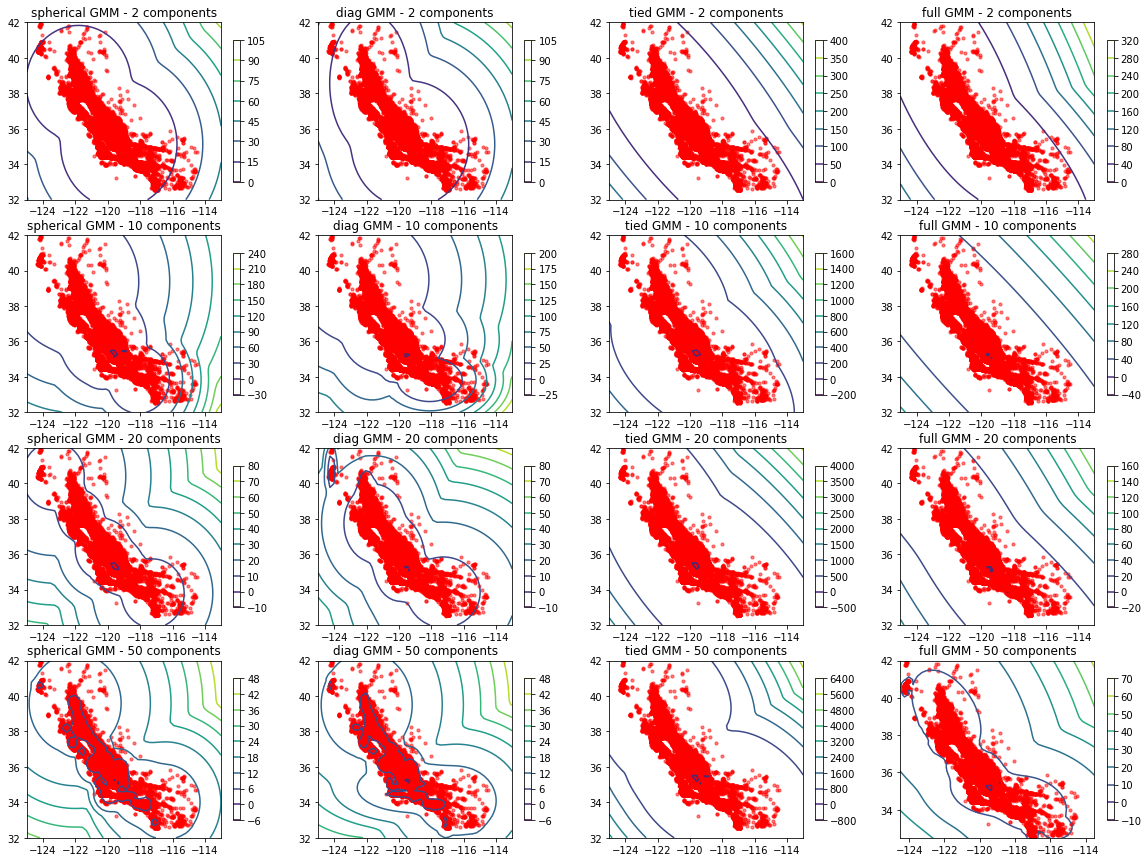

In [21]:
# 1st = Creating a meshgrid to plot the GMM with PCA in
x = np.linspace(32, 42)   
y = np.linspace(-125, -113)
Xx, Yy = np.meshgrid(x, y)
XX = np.array([Xx.ravel(), Yy.ravel()]).T

#Initiating different gaussian models and different number of components
ctype=['spherical','diag','tied','full']
n_components=[1,2,3,4]
n_gmm_components=[2,10,20,50]


%matplotlib inline

# Initiating a figure/figure size with subplots 
fig, axs = plt.subplots(len(n_components),4, figsize=(20,15))
plt.ylim([32.5,42])
plt.xlim([-124.5,-113.5])

# Loop for each different Gaussian model and plot the GMM score_samples within the meshgrid
# Also scatterplot the PCA 2-d data
for n,gn in zip(n_components,n_gmm_components):
    counter=0
    for c in ctype:
        GMM = GaussianMixture(n_components=gn, covariance_type=c, random_state=12345)
        clstrs=GMM.fit(train_data)
        Zz = -clstrs.score_samples(XX)   #use negative because log of probability is negative so I wanted to flip the sign
        Zz = Zz.reshape(Xx.shape)
        CS = axs[n-1,counter].contour(Yy, Xx, Zz)  
        CB = fig.colorbar(CS, shrink=0.8, extend='both', ax=axs[n-1,counter])
        
#         axs[n-1,counter].scatter(df_compost.longitude, df_compost.latitude, color='b', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_dairy.longitude, df_dairy.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_digester.longitude, df_digester.latitude, color='r', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_feedlot.longitude, df_feedlot.latitude, color='c', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_landfill.longitude, df_landfill.latitude, color='m', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_lng.longitude, df_lng.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_cng.longitude, df_cng.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_ngs.longitude, df_ngs.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_ogfacilityb.longitude, df_ogfacilityb.latitude, color='y', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_ogwell.longitude, df_ogwell.latitude, color='y', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_powerplant.longitude, df_powerplant.latitude, color='k', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_ngplant.longitude, df_ngplant.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_refinery.longitude, df_refinery.latitude, color='y', alpha=0.5, s=10)
#         axs[n-1,counter].scatter(df_ngstorage.longitude, df_ngstorage.latitude, color='g', alpha=0.5, s=10)
#         axs[n-1,counter]..scatter(df_wastewater.longitude, df_wastewater.latitude, color='r', alpha=0.5, s=10)
        axs[n-1,counter].scatter(df.longitude, df.latitude, color='r', alpha=0.5, s=10)
        
        axs[n-1,counter].set_title("%s GMM - %s components" %(c,gn))      
        
        counter+=1